In [1]:
using Dates

In [3]:
d = today()

2021-12-19

In [4]:
dt = now()

2021-12-19T07:23:14.545

In [5]:
t=Dates.Time(now())

07:23:43.759

In [7]:
Date("25/12/2019", "dd/mm/yyyy") # Christmas day in 2019 


2019-12-25

In [8]:
d = ["$(rand(2000:2020))-$(rand(1:12))-$(rand(1:28))" for _ in 1:100] 

100-element Vector{String}:
 "2013-7-4"
 "2010-8-11"
 "2010-9-2"
 "2009-8-19"
 "2006-8-12"
 "2013-11-22"
 "2008-12-11"
 "2008-5-23"
 "2004-7-15"
 "2013-10-18"
 ⋮
 "2006-8-22"
 "2000-7-13"
 "2018-8-22"
 "2007-8-11"
 "2017-5-14"
 "2015-9-18"
 "2011-11-17"
 "2010-1-24"
 "2011-4-11"

In [9]:
Date.(d, "yyyy-mm-dd")

100-element Vector{Date}:
 2013-07-04
 2010-08-11
 2010-09-02
 2009-08-19
 2006-08-12
 2013-11-22
 2008-12-11
 2008-05-23
 2004-07-15
 2013-10-18
 ⋮
 2006-08-22
 2000-07-13
 2018-08-22
 2007-08-11
 2017-05-14
 2015-09-18
 2011-11-17
 2010-01-24
 2011-04-11

In [12]:
using TimeSeries
using MarketData
using Plots

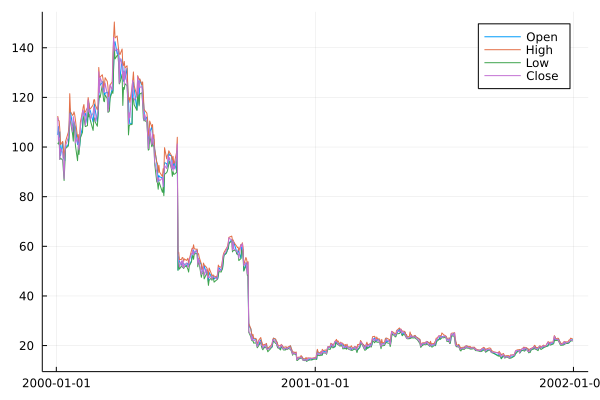

In [13]:
plot(MarketData.ohlc)

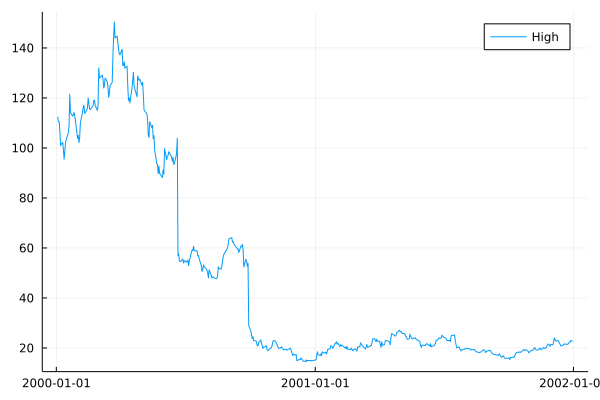

In [14]:
plot(MarketData.ohlc[:High])

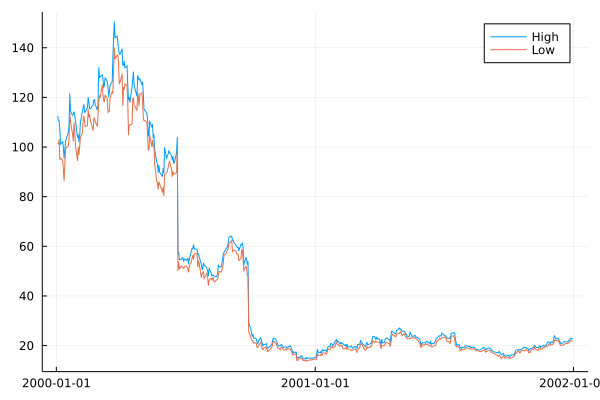

In [15]:
plot!(MarketData.ohlc[:Low]) 

In [16]:
fieldnames(typeof(MarketData.ohlc)) 

(:timestamp, :values, :colnames, :meta)

In [17]:
MarketData.ohlc |> head

6×4 TimeArray{Float64, 2, Date, Matrix{Float64}} 2000-01-03 to 2000-01-10
│            │ Open   │ High   │ Low    │ Close  │
├────────────┼────────┼────────┼────────┼────────┤
│ 2000-01-03 │ 104.88 │ 112.5  │ 101.69 │ 111.94 │
│ 2000-01-04 │ 108.25 │ 110.62 │ 101.19 │ 102.5  │
│ 2000-01-05 │ 103.75 │ 110.56 │ 103.0  │ 104.0  │
│ 2000-01-06 │ 106.12 │ 107.0  │ 95.0   │ 95.0   │
│ 2000-01-07 │ 96.5   │ 101.0  │ 95.5   │ 99.5   │
│ 2000-01-10 │ 102.0  │ 102.25 │ 94.75  │ 97.75  │

In [18]:
timestamp(MarketData.ohlc) 

500-element Vector{Date}:
 2000-01-03
 2000-01-04
 2000-01-05
 2000-01-06
 2000-01-07
 2000-01-10
 2000-01-11
 2000-01-12
 2000-01-13
 2000-01-14
 ⋮
 2001-12-18
 2001-12-19
 2001-12-20
 2001-12-21
 2001-12-24
 2001-12-26
 2001-12-27
 2001-12-28
 2001-12-31

In [19]:
values(MarketData.ohlc) 

500×4 Matrix{Float64}:
 104.88  112.5   101.69  111.94
 108.25  110.62  101.19  102.5
 103.75  110.56  103.0   104.0
 106.12  107.0    95.0    95.0
  96.5   101.0    95.5    99.5
 102.0   102.25   94.75   97.75
  95.94   99.38   90.5    92.75
  95.0    95.5    86.5    87.19
  94.48   98.75   92.5    96.75
 100.0   102.25   99.38  100.44
   ⋮                     
  20.89   21.33   20.22   21.01
  20.58   21.68   20.47   21.62
  21.4    21.47   20.62   20.67
  21.01   21.54   20.8    21.0
  20.9    21.45   20.9    21.36
  21.35   22.3    21.14   21.49
  21.58   22.25   21.58   22.07
  21.97   23.0    21.96   22.43
  22.51   22.66   21.83   21.9

In [20]:
colnames(MarketData.ohlc) 

4-element Vector{Symbol}:
 :Open
 :High
 :Low
 :Close

In [21]:
rename(MarketData.ohlc, [:Opening, :Maximum, :Minimum, :Closing]) 

500×4 TimeArray{Float64, 2, Date, Matrix{Float64}} 2000-01-03 to 2001-12-31
│            │ Opening │ Maximum │ Minimum │ Closing │
├────────────┼─────────┼─────────┼─────────┼─────────┤
│ 2000-01-03 │ 104.88  │ 112.5   │ 101.69  │ 111.94  │
│ 2000-01-04 │ 108.25  │ 110.62  │ 101.19  │ 102.5   │
│ 2000-01-05 │ 103.75  │ 110.56  │ 103.0   │ 104.0   │
│ 2000-01-06 │ 106.12  │ 107.0   │ 95.0    │ 95.0    │
│ 2000-01-07 │ 96.5    │ 101.0   │ 95.5    │ 99.5    │
│ 2000-01-10 │ 102.0   │ 102.25  │ 94.75   │ 97.75   │
│ 2000-01-11 │ 95.94   │ 99.38   │ 90.5    │ 92.75   │
│ 2000-01-12 │ 95.0    │ 95.5    │ 86.5    │ 87.19   │
│ ⋮          │ ⋮       │ ⋮       │ ⋮       │ ⋮       │
│ 2001-12-20 │ 21.4    │ 21.47   │ 20.62   │ 20.67   │
│ 2001-12-21 │ 21.01   │ 21.54   │ 20.8    │ 21.0    │
│ 2001-12-24 │ 20.9    │ 21.45   │ 20.9    │ 21.36   │
│ 2001-12-26 │ 21.35   │ 22.3    │ 21.14   │ 21.49   │
│ 2001-12-27 │ 21.58   │ 22.25   │ 21.58   │ 22.07   │
│ 2001-12-28 │ 21.97   │ 23.0    │ 21.96   │

In [22]:
MarketData.ohlc[:High] 

500×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2000-01-03 to 2001-12-31
│            │ High   │
├────────────┼────────┤
│ 2000-01-03 │ 112.5  │
│ 2000-01-04 │ 110.62 │
│ 2000-01-05 │ 110.56 │
│ 2000-01-06 │ 107.0  │
│ 2000-01-07 │ 101.0  │
│ 2000-01-10 │ 102.25 │
│ 2000-01-11 │ 99.38  │
│ 2000-01-12 │ 95.5   │
│ ⋮          │ ⋮      │
│ 2001-12-20 │ 21.47  │
│ 2001-12-21 │ 21.54  │
│ 2001-12-24 │ 21.45  │
│ 2001-12-26 │ 22.3   │
│ 2001-12-27 │ 22.25  │
│ 2001-12-28 │ 23.0   │
│ 2001-12-31 │ 22.66  │

In [23]:
MarketData.ohlc[:High, :Low] 

500×2 TimeArray{Float64, 2, Date, Matrix{Float64}} 2000-01-03 to 2001-12-31
│            │ High   │ Low    │
├────────────┼────────┼────────┤
│ 2000-01-03 │ 112.5  │ 101.69 │
│ 2000-01-04 │ 110.62 │ 101.19 │
│ 2000-01-05 │ 110.56 │ 103.0  │
│ 2000-01-06 │ 107.0  │ 95.0   │
│ 2000-01-07 │ 101.0  │ 95.5   │
│ 2000-01-10 │ 102.25 │ 94.75  │
│ 2000-01-11 │ 99.38  │ 90.5   │
│ 2000-01-12 │ 95.5   │ 86.5   │
│ ⋮          │ ⋮      │ ⋮      │
│ 2001-12-20 │ 21.47  │ 20.62  │
│ 2001-12-21 │ 21.54  │ 20.8   │
│ 2001-12-24 │ 21.45  │ 20.9   │
│ 2001-12-26 │ 22.3   │ 21.14  │
│ 2001-12-27 │ 22.25  │ 21.58  │
│ 2001-12-28 │ 23.0   │ 21.96  │
│ 2001-12-31 │ 22.66  │ 21.83  │

In [24]:
maximum(values(MarketData.ohlc[:Close])) 

144.19

In [25]:
findall(values(MarketData.ohlc[:Close]) .== 144.19) 

1-element Vector{Int64}:
 56

In [26]:
MarketData.ohlc[56] 

1×4 TimeArray{Float64, 2, Date, Matrix{Float64}} 2000-03-22 to 2000-03-22
│            │ Open   │ High   │ Low    │ Close  │
├────────────┼────────┼────────┼────────┼────────┤
│ 2000-03-22 │ 132.78 │ 144.38 │ 131.56 │ 144.19 │

In [27]:
MarketData.ohlc[50:60] 

11×4 TimeArray{Float64, 2, Date, Matrix{Float64}} 2000-03-14 to 2000-03-28
│            │ Open   │ High   │ Low    │ Close  │
├────────────┼────────┼────────┼────────┼────────┤
│ 2000-03-14 │ 121.22 │ 124.25 │ 114.0  │ 114.25 │
│ 2000-03-15 │ 115.62 │ 120.25 │ 114.12 │ 116.25 │
│ 2000-03-16 │ 117.31 │ 122.0  │ 114.5  │ 121.56 │
│ 2000-03-17 │ 120.12 │ 125.0  │ 119.62 │ 125.0  │
│ 2000-03-20 │ 123.5  │ 126.25 │ 122.38 │ 123.0  │
│ 2000-03-21 │ 122.56 │ 136.75 │ 121.62 │ 134.94 │
│ 2000-03-22 │ 132.78 │ 144.38 │ 131.56 │ 144.19 │
│ 2000-03-23 │ 142.0  │ 150.38 │ 140.0  │ 141.31 │
│ 2000-03-24 │ 142.44 │ 143.94 │ 135.5  │ 138.69 │
│ 2000-03-27 │ 137.62 │ 144.75 │ 136.88 │ 139.56 │
│ 2000-03-28 │ 137.25 │ 142.0  │ 137.12 │ 139.12 │

In [28]:
MarketData.ohlc[[7:7:49; 54;55;56;57; 63:7:70]] 

13×4 TimeArray{Float64, 2, Date, Matrix{Float64}} 2000-01-11 to 2000-04-11
│            │ Open   │ High   │ Low    │ Close  │
├────────────┼────────┼────────┼────────┼────────┤
│ 2000-01-11 │ 95.94  │ 99.38  │ 90.5   │ 92.75  │
│ 2000-01-21 │ 114.25 │ 114.25 │ 110.19 │ 111.31 │
│ 2000-02-01 │ 104.0  │ 105.0  │ 100.0  │ 100.25 │
│ 2000-02-10 │ 112.88 │ 113.88 │ 110.0  │ 113.5  │
│ 2000-02-22 │ 110.12 │ 116.94 │ 106.69 │ 113.81 │
│ 2000-03-02 │ 127.0  │ 127.94 │ 120.69 │ 122.0  │
│ 2000-03-13 │ 122.12 │ 126.5  │ 119.5  │ 121.31 │
│ 2000-03-20 │ 123.5  │ 126.25 │ 122.38 │ 123.0  │
│ 2000-03-21 │ 122.56 │ 136.75 │ 121.62 │ 134.94 │
│ 2000-03-22 │ 132.78 │ 144.38 │ 131.56 │ 144.19 │
│ 2000-03-23 │ 142.0  │ 150.38 │ 140.0  │ 141.31 │
│ 2000-03-31 │ 127.44 │ 137.25 │ 126.0  │ 135.81 │
│ 2000-04-11 │ 123.5  │ 124.88 │ 118.06 │ 119.44 │

# Querying TimeArray objects
The TimeSeries module exposes a powerful, query-like API for filtering time series data. Let's take a look at each of them.

In [29]:
when(MarketData.ohlc[1:70], Dates.dayname, "Wednesday") 

14×4 TimeArray{Float64, 2, Date, Matrix{Float64}} 2000-01-05 to 2000-04-05
│            │ Open   │ High   │ Low    │ Close  │
├────────────┼────────┼────────┼────────┼────────┤
│ 2000-01-05 │ 103.75 │ 110.56 │ 103.0  │ 104.0  │
│ 2000-01-12 │ 95.0   │ 95.5   │ 86.5   │ 87.19  │
│ 2000-01-19 │ 105.62 │ 108.75 │ 103.38 │ 106.56 │
│ 2000-01-26 │ 110.0  │ 114.19 │ 109.75 │ 110.19 │
│ 2000-02-02 │ 100.75 │ 102.12 │ 97.0   │ 98.81  │
│ 2000-02-09 │ 114.12 │ 117.12 │ 112.44 │ 112.62 │
│ 2000-02-16 │ 117.75 │ 118.12 │ 112.12 │ 114.12 │
│ 2000-02-23 │ 113.23 │ 119.0  │ 111.0  │ 116.25 │
│ 2000-03-01 │ 118.56 │ 132.06 │ 118.5  │ 130.31 │
│ 2000-03-08 │ 122.88 │ 123.94 │ 118.56 │ 122.0  │
│ 2000-03-15 │ 115.62 │ 120.25 │ 114.12 │ 116.25 │
│ 2000-03-22 │ 132.78 │ 144.38 │ 131.56 │ 144.19 │
│ 2000-03-29 │ 139.38 │ 139.44 │ 133.83 │ 135.94 │
│ 2000-04-05 │ 126.47 │ 132.88 │ 124.0  │ 130.38 │

In [30]:
when(MarketData.ohlc, Dates.monthname, "August") 

46×4 TimeArray{Float64, 2, Date, Matrix{Float64}} 2000-08-01 to 2001-08-31
│            │ Open  │ High  │ Low   │ Close │
├────────────┼───────┼───────┼───────┼───────┤
│ 2000-08-01 │ 50.31 │ 51.16 │ 49.25 │ 49.31 │
│ 2000-08-02 │ 49.0  │ 49.94 │ 47.19 │ 47.25 │
│ 2000-08-03 │ 45.56 │ 48.06 │ 44.25 │ 48.0  │
│ 2000-08-04 │ 49.47 │ 51.25 │ 46.31 │ 47.38 │
│ 2000-08-07 │ 47.88 │ 49.06 │ 47.19 │ 47.94 │
│ 2000-08-08 │ 47.94 │ 48.0  │ 46.31 │ 46.75 │
│ 2000-08-09 │ 48.12 │ 48.44 │ 47.25 │ 47.5  │
│ 2000-08-10 │ 48.0  │ 48.44 │ 47.38 │ 47.56 │
│ ⋮          │ ⋮     │ ⋮     │ ⋮     │ ⋮     │
│ 2001-08-23 │ 18.2  │ 18.34 │ 17.58 │ 17.81 │
│ 2001-08-24 │ 18.0  │ 18.62 │ 17.65 │ 18.57 │
│ 2001-08-27 │ 18.6  │ 19.3  │ 18.16 │ 18.92 │
│ 2001-08-28 │ 18.9  │ 19.14 │ 18.4  │ 18.4  │
│ 2001-08-29 │ 18.44 │ 18.83 │ 17.83 │ 17.83 │
│ 2001-08-30 │ 17.74 │ 18.18 │ 17.28 │ 17.83 │
│ 2001-08-31 │ 17.73 │ 18.6  │ 17.65 │ 18.55 │

In [31]:
from(MarketData.ohlc, Date(2000, 3, 22)) 

445×4 TimeArray{Float64, 2, Date, Matrix{Float64}} 2000-03-22 to 2001-12-31
│            │ Open   │ High   │ Low    │ Close  │
├────────────┼────────┼────────┼────────┼────────┤
│ 2000-03-22 │ 132.78 │ 144.38 │ 131.56 │ 144.19 │
│ 2000-03-23 │ 142.0  │ 150.38 │ 140.0  │ 141.31 │
│ 2000-03-24 │ 142.44 │ 143.94 │ 135.5  │ 138.69 │
│ 2000-03-27 │ 137.62 │ 144.75 │ 136.88 │ 139.56 │
│ 2000-03-28 │ 137.25 │ 142.0  │ 137.12 │ 139.12 │
│ 2000-03-29 │ 139.38 │ 139.44 │ 133.83 │ 135.94 │
│ 2000-03-30 │ 133.56 │ 137.69 │ 125.44 │ 125.75 │
│ 2000-03-31 │ 127.44 │ 137.25 │ 126.0  │ 135.81 │
│ ⋮          │ ⋮      │ ⋮      │ ⋮      │ ⋮      │
│ 2001-12-20 │ 21.4   │ 21.47  │ 20.62  │ 20.67  │
│ 2001-12-21 │ 21.01  │ 21.54  │ 20.8   │ 21.0   │
│ 2001-12-24 │ 20.9   │ 21.45  │ 20.9   │ 21.36  │
│ 2001-12-26 │ 21.35  │ 22.3   │ 21.14  │ 21.49  │
│ 2001-12-27 │ 21.58  │ 22.25  │ 21.58  │ 22.07  │
│ 2001-12-28 │ 21.97  │ 23.0   │ 21.96  │ 22.43  │
│ 2001-12-31 │ 22.51  │ 22.66  │ 21.83  │ 21.9   │

In [32]:
to(MarketData.ohlc, Date(2000, 3, 22)) 

56×4 TimeArray{Float64, 2, Date, Matrix{Float64}} 2000-01-03 to 2000-03-22
│            │ Open   │ High   │ Low    │ Close  │
├────────────┼────────┼────────┼────────┼────────┤
│ 2000-01-03 │ 104.88 │ 112.5  │ 101.69 │ 111.94 │
│ 2000-01-04 │ 108.25 │ 110.62 │ 101.19 │ 102.5  │
│ 2000-01-05 │ 103.75 │ 110.56 │ 103.0  │ 104.0  │
│ 2000-01-06 │ 106.12 │ 107.0  │ 95.0   │ 95.0   │
│ 2000-01-07 │ 96.5   │ 101.0  │ 95.5   │ 99.5   │
│ 2000-01-10 │ 102.0  │ 102.25 │ 94.75  │ 97.75  │
│ 2000-01-11 │ 95.94  │ 99.38  │ 90.5   │ 92.75  │
│ 2000-01-12 │ 95.0   │ 95.5   │ 86.5   │ 87.19  │
│ ⋮          │ ⋮      │ ⋮      │ ⋮      │ ⋮      │
│ 2000-03-14 │ 121.22 │ 124.25 │ 114.0  │ 114.25 │
│ 2000-03-15 │ 115.62 │ 120.25 │ 114.12 │ 116.25 │
│ 2000-03-16 │ 117.31 │ 122.0  │ 114.5  │ 121.56 │
│ 2000-03-17 │ 120.12 │ 125.0  │ 119.62 │ 125.0  │
│ 2000-03-20 │ 123.5  │ 126.25 │ 122.38 │ 123.0  │
│ 2000-03-21 │ 122.56 │ 136.75 │ 121.62 │ 134.94 │
│ 2000-03-22 │ 132.78 │ 144.38 │ 131.56 │ 144.19 │

In [33]:
findall(MarketData.ohlc[:Close] .>= MarketData.ohlc[:Open] .+ MarketData.ohlc[:Open] .* 0.1) 

7-element Vector{Int64}:
  55
  74
 119
 254
 260
 271
 302

# Time Series Forecasting
In the previous chapter, we learned how to handle date and time with Julia. This allowed us to understand the very important concept of time series data. Now, we are ready to discuss yet another highly important data science topic—time series analysis.

Time series analysis and forecasting represents a key strategic and decisive component of any organization, from understanding top sales periods to end of season intervals and discounts, scheduling employees' time off, budgets, fiscal years, product release cycles, increased demand in raw materials, and many, many other aspects. Understanding and predicting the evolution of various business indicators over time is a necessary part of doing business, whether we're talking about a school, a billion dollar corporation, a hotel, a supermarket, or a government.

However, time series data analysis is one of the most fairly complex tasks of data science. The nature and particularities of chronological events led to the development of specialized algorithms and methodologies.

In this chapter, we'll study the basics of time series analysis and forecasting using Julia. Although a fairly young language, Julia already has good support for handling time-related data. In the previous chapter, we've learned about the Dates module and about the TimeSeries package. In this chapter, we'll dive deeper and apply what we have previously studied. We'll also learn about more advanced TimeSeries methods and about a few other packages for working with temporal data. We will be covering the following topics:

Exploratory data analysis of the unemployment figures of the European Union (EU)
Trends, cycles, seasonality, and errors—components of a time series
Time series decomposition
Stationarity, differencing, and autocorrelation of time series data
Learning to apply simple forecasting techniques

In [37]:
using CSV, DataFrames

In [39]:
df = CSV.read("une_rt_m1.tsv", header = true, delim = '\t', DataFrame) 

,"GEO,S_ADJ,AGE,UNIT,SEX\TIME"
,String
1,"European Union (current composition),Unadjusted data (i.e. neither seasonally adjusted nor calendar adjusted data),Total,Thousand persons,Total"


In [41]:
values = convert(Array, df[1, 2:end])

MethodError: MethodError: Cannot `convert` an object of type 
  DataFrameRow{DataFrame, DataFrames.SubIndex{DataFrames.Index, UnitRange{Int64}, UnitRange{Int64}}} to an object of type 
  Array
Closest candidates are:
  convert(::Type{T}, !Matched::LinearAlgebra.Factorization) where T<:AbstractArray at C:\Users\gilju\AppData\Local\Programs\Julia-1.7.0\share\julia\stdlib\v1.7\LinearAlgebra\src\factorization.jl:58
  convert(::Type{Array}, !Matched::StaticArrays.SizedArray{S, T, N, M, Array{T, M}}) where {S, T, N, M} at C:\Users\gilju\.julia\packages\StaticArrays\OWJK7\src\SizedArray.jl:105
  convert(::Type{Array}, !Matched::StaticArrays.SizedArray{S, T, N, M} where {T, N, M}) where S at C:\Users\gilju\.julia\packages\StaticArrays\OWJK7\src\SizedArray.jl:102
  ...

In [42]:
values = map(x -> parse(Int, replace(x, " "=>"")), values)[:] 

MethodError: MethodError: no method matching length(::typeof(values))
Closest candidates are:
  length(!Matched::Union{Base.KeySet, Base.ValueIterator}) at C:\Users\gilju\AppData\Local\Programs\Julia-1.7.0\share\julia\base\abstractdict.jl:58
  length(!Matched::Union{Tables.AbstractColumns, Tables.AbstractRow}) at C:\Users\gilju\.julia\packages\Tables\M26tI\src\Tables.jl:175
  length(!Matched::Union{DataStructures.OrderedRobinDict, DataStructures.RobinDict}) at C:\Users\gilju\.julia\packages\DataStructures\vSp4s\src\ordered_robin_dict.jl:86
  ...

# Trend
The trend can be defined as the long-term tendency of the time series data—the fact that, on average, the values tend to increase or decrease over a period of time. Looking at our plot, we can identify three distinct trends:


A downward trend from 2005 until 2008 (less people unemployed on a year-on-year basis); an upward trend starting in 2008 and manifesting until 2013 (unemployment rose on average); and again, a downward trend between 2013, all the way until the end of 2017 (the number of people without work constantly decreased).

# Seasonality
Seasonality is a regularly repeating pattern of highs and lows that is related to calendar time; that is, it's directly influenced by seasons, quarters, months, and so on. Think, for instance, about the electricity usage in a city—we'll probably see increases in consumption during the summer due to air conditioning, and in wintertime due to needing to heat the houses instead. In a similar manner, by looking at a hotel at the seaside, we'll see a significant increase in bookings during the summer, followed by a decrease in the winter.

Thus, seasonality generates effects that are reasonably stable with respect to timing, direction, and magnitude. The most common calendar-related influences are natural conditions (the weather), business and administrative procedures (fiscal year), and social and cultural behaviors (bank holidays due to national and religious holidays, key dates like Christmas, Valentine's Day, and so on). It also includes effects that are caused by calendar events, which are recurrent but not fixed in terms of date (such as Easter, whose date falls on a certain Sunday each year, but the actual date varies).

Unemployment data suffers a strong seasonal influence—during the summer months, more people are employed. These seem to be temporary jobs, probably in tourism, to help hotels and restaurants cope with the influx of holiday goers—but maybe also in the office and retail sectors to cover for the regular employees' time off. We can clearly identify this on our plot—the summer months bring the lowest unemployment figures for the year, with the values beginning to go up again in autumn:

# Random noise
The default assumption when analyzing time series data is that we can identify an underlying pattern (as defined by its trend and seasonality components). However, when there is such a systematic pattern in the data (some time series data is completely random, for example, earthquake incidence), it will also be accompanied by variances—fluctuations in the data that are categorized as random noise, errors, or irregularities. They make the task of identifying the patterns more difficult, and for this reason, data scientists will use some form of noise filtering.

In other words, this irregular component is what remains after the seasonal and trend components have been computed and removed. They are short-term fluctuations, and are neither systematic nor predictable.

# Cyclicity
Cyclicity is similar to seasonality in a way, and for this reason, the two are often confused. However, they are two different things, and the distinction is important. Cyclical periods represent larger swathes of time where we can identify recurring patterns in the data (periods of growth or decline) and which can't be explained away by calendar patterns. They are usually larger, spanning a few years, and do not overlap with calendar events. Such cyclical elements can be introduced by product release cycles (the release of a car model, or a new version of an operating system, or an upgrade to a line of laptops), election cycles (for government budgeting or companies working with government contracts), and so on.

# Time series decomposition
We can thus say that any value in a time series can be represented through a function of the four components we discussed earlier—trend, seasonality, error, and cycle. The relationship between the four components can be either additive or multiplicative.

The additive model is used when the seasonal variation stays about the same across time. The trend may be upward or downward, but the seasonality stays more or less the same. A plot of such data will look very similar to this:



If we draw two imaginary lines between the yearly maximums and the yearly minimums, the lines will be pretty much parallel.

For an additive time series model, the four components are summed up to produce the values in the series. Thus, a time series Y can be decomposed into Y = Trend + Cycle + Seasonality + Noise.

A multiplicative model should be used with a time series where the seasonal variability increases over time. For example, a typical multiplicative time series is represented by the international airline passenger data between January 1949 and January 1960:



We can see how the variation in the seasonal pattern is correlated with the level of the time series: the more passengers we have, the higher the variation. A multiplicative time series Y can be represented as Y = Trend * Cycle * Seasonality * Noise.

As a side note, we can convert a multiplicative model into an additive model by transforming the data until it becomes stable over time, for example, by means of log transformations—Y = Trend * Cycle * Seasonality * Noise is equivalent to log Y = log Trend + log Cycle + log Seasonality + log Noise.
Splitting a time series into its components is a widely employed technique for time data analysis. This is known as time series decomposition, and it also represents the foundation of time series forecasting.

In [43]:
unemployment_data = readtimearray("UE-unemployment.tsv")

156×1 TimeArray{Float64, 2, Date, Matrix{Float64}} 2005-01-01 to 2017-12-01
│            │ Values  │
├────────────┼─────────┤
│ 2005-01-01 │ 21974.0 │
│ 2005-02-01 │ 22303.0 │
│ 2005-03-01 │ 22085.0 │
│ 2005-04-01 │ 21036.0 │
│ 2005-05-01 │ 20849.0 │
│ 2005-06-01 │ 20549.0 │
│ 2005-07-01 │ 19873.0 │
│ 2005-08-01 │ 20210.0 │
│ ⋮          │ ⋮       │
│ 2017-06-01 │ 18155.0 │
│ 2017-07-01 │ 18172.0 │
│ 2017-08-01 │ 18155.0 │
│ 2017-09-01 │ 18121.0 │
│ 2017-10-01 │ 18199.0 │
│ 2017-11-01 │ 18027.0 │
│ 2017-12-01 │ 17705.0 │

In [44]:
TimeSeries.head(unemployment_data, 10)

10×1 TimeArray{Float64, 2, Date, Matrix{Float64}} 2005-01-01 to 2005-10-01
│            │ Values  │
├────────────┼─────────┤
│ 2005-01-01 │ 21974.0 │
│ 2005-02-01 │ 22303.0 │
│ 2005-03-01 │ 22085.0 │
│ 2005-04-01 │ 21036.0 │
│ 2005-05-01 │ 20849.0 │
│ 2005-06-01 │ 20549.0 │
│ 2005-07-01 │ 19873.0 │
│ 2005-08-01 │ 20210.0 │
│ 2005-09-01 │ 20554.0 │
│ 2005-10-01 │ 20919.0 │

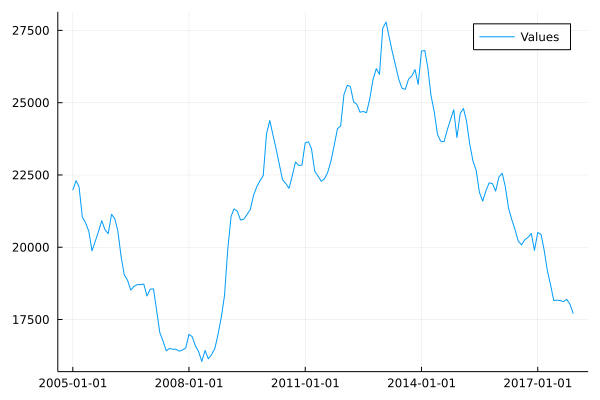

In [45]:
plot(unemployment_data) 

We can easily see that the number of unemployed people had been steadily decreasing since 2005, reaching a historical minimum in the second half of 2008. From there, over a couple of months, it skyrocketed to levels unknown since 2005. This was the moment when the recession hit the EU's economy. From that point on, unemployment numbers continued to grow, until they finally reached a peak at the beginning of 2013. The maximum number of people without a job was reached in February 2013, after which the European economy began to recover, with the unemployment numbers rapidly declining and approaching pre-recession levels.

# Explaining data – an additive approach or multiplicative approach?
This is the question—which of the two approaches does a better job of explaining our data? One way to answer this question is to look at the cycle-by-cycle values and see if there is significant variation. As we're dealing with yearly cycles, let's extract and plot the year on year values as follows:

julia> plot() 

# Extracting the trend
The first step in decomposing a time series is to extract the trend component. A widely used technique for computing the trend is called smoothing. As the name suggests, it smooths out the values by removing the noise and blurring the seasonality so that we can identify the trend.

One way of performing smoothing is through moving averages. In financial applications, the simple moving average is the unweighted mean of the previous n points of data. It's like applying a moving window on top of our time series and performing the calculation using the visible data. Then, we slide the window by one position and repeat the calculation. To smooth out seasonal data, the window should be the size of the seasonal period—in our case, 12 months. So, to apply simple moving average smoothing to our data, we'll start by taking the first 12 month period (the year 2005), sum up the values, and then divide them by 12 to get their average. Then, we'll slide our window by one month and repeat the computation. As a result, we eliminate the effect of the seasonal component and cancel out the impact of the noise.

The TimeSeries package provides a series of apply methods that implement common transformations of time series data. One of them is the moving method, which can be used to compute the moving average of a series. Let's compute the moving average for a 12 month interval in order to smooth out the seasonality component:

In [56]:
using Statistics

In [57]:
moving_avg = moving(mean, unemployment_data, 12) 

145×1 TimeArray{Float64, 2, Date, Matrix{Float64}} 2005-12-01 to 2017-12-01
│            │ Values     │
├────────────┼────────────┤
│ 2005-12-01 │ 20951.75   │
│ 2006-01-01 │ 20882.25   │
│ 2006-02-01 │ 20772.0    │
│ 2006-03-01 │ 20646.4167 │
│ 2006-04-01 │ 20534.0    │
│ 2006-05-01 │ 20383.8333 │
│ 2006-06-01 │ 20243.0    │
│ 2006-07-01 │ 20130.0    │
│ ⋮          │ ⋮          │
│ 2017-06-01 │ 19851.8333 │
│ 2017-07-01 │ 19681.5833 │
│ 2017-08-01 │ 19521.0    │
│ 2017-09-01 │ 19343.0    │
│ 2017-10-01 │ 19164.3333 │
│ 2017-11-01 │ 18960.1667 │
│ 2017-12-01 │ 18777.8333 │

As we can see, the result is a new time series that contains the mean of 12-month periods in our original time series. The first 12 values of the original series are consumed by this operation so that our new series starts with December 2005. If you wish to keep the initial values, the moving function takes an additional keyword argument, padding. By default, padding is false, but if set to true, the consumed timestamps will be kept and their values will be set to NaN:

In [58]:
moving(mean, unemployment_data, 12, padding = true)

156×1 TimeArray{Float64, 2, Date, Matrix{Float64}} 2005-01-01 to 2017-12-01
│            │ Values     │
├────────────┼────────────┤
│ 2005-01-01 │ NaN        │
│ 2005-02-01 │ NaN        │
│ 2005-03-01 │ NaN        │
│ 2005-04-01 │ NaN        │
│ 2005-05-01 │ NaN        │
│ 2005-06-01 │ NaN        │
│ 2005-07-01 │ NaN        │
│ 2005-08-01 │ NaN        │
│ ⋮          │ ⋮          │
│ 2017-06-01 │ 19851.8333 │
│ 2017-07-01 │ 19681.5833 │
│ 2017-08-01 │ 19521.0    │
│ 2017-09-01 │ 19343.0    │
│ 2017-10-01 │ 19164.3333 │
│ 2017-11-01 │ 18960.1667 │
│ 2017-12-01 │ 18777.8333 │

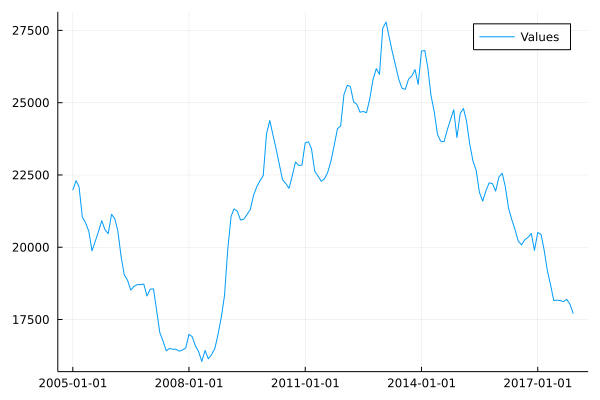

In [59]:
plot(unemployment_data)

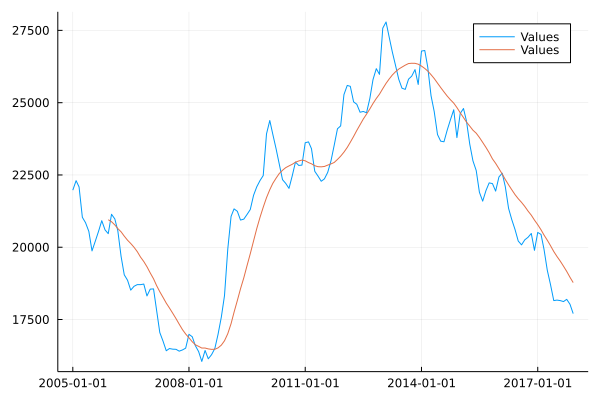

In [60]:
plot!(moving_avg) 

Computing the seasonality
Now that we have extracted the trend, we can remove it from the initial time series. This is done by division. We will be left with the product of the seasonal and noise components. Thus, SN = Y/T.

To calculate the fraction between TimeArray objects, we'll use the element-wise division operator, ./:

In [62]:
sn = unemployment_data ./ moving_avg 

145×1 TimeArray{Float64, 2, Date, Matrix{Float64}} 2005-12-01 to 2017-12-01
│            │ Values_Values │
├────────────┼───────────────┤
│ 2005-12-01 │ 0.977         │
│ 2006-01-01 │ 1.0123        │
│ 2006-02-01 │ 1.01          │
│ 2006-03-01 │ 0.9967        │
│ 2006-04-01 │ 0.9588        │
│ 2006-05-01 │ 0.9344        │
│ 2006-06-01 │ 0.9316        │
│ 2006-07-01 │ 0.9199        │
│ ⋮          │ ⋮             │
│ 2017-06-01 │ 0.9145        │
│ 2017-07-01 │ 0.9233        │
│ 2017-08-01 │ 0.93          │
│ 2017-09-01 │ 0.9368        │
│ 2017-10-01 │ 0.9496        │
│ 2017-11-01 │ 0.9508        │
│ 2017-12-01 │ 0.9429        │

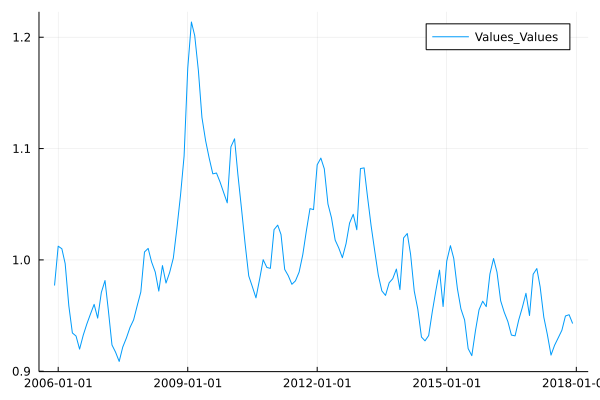

In [63]:
plot(sn) 

The next step is calculating the sum over years of these values for the same month. That is, we'll sum the value for all of the months of January throughout all the years; then, we will do the same for February, March, and so on. We'll get the average over all the years, for each calendar month. This will lead to the minimization of the noise:

In [64]:
month_avg = Float64[]
for m in 1:12 
    md = when(sn, month, m) 
    push!(month_avg, mean(TimeSeries.values(md)[:]))  
end 


In [65]:
month_avg

12-element Vector{Float64}:
 1.0376512639850295
 1.0466377033754193
 1.0301198608484736
 1.0014842494206564
 0.9830320492870818
 0.9705256323692862
 0.9630153389575429
 0.9634443756458616
 0.9763782494700372
 0.9893785521401298
 0.9987100016253194
 0.9913489915307253

In [66]:
s = sum(month_avg)

11.951726268655563

Theoretically, these values should add up to 12. In practice, that doesn't happen (although we're pretty close). We can easily sum up all of the elements of an array using the sum function:

As a consequence, we need to normalize the averages so that they do sum up to 12. This is achieved by multiplying each seasonal factor by 12 and then dividing each factor by their sum:

In [68]:
norm_month_avg = map(m -> 12m/s, month_avg) 

12-element Vector{Float64}:
 1.0418423989910408
 1.0508651351431808
 1.0342805760704734
 1.0055293037095092
 0.9870025740450584
 0.9744456429674838
 0.9669050150351592
 0.9673357846281114
 0.9803218991358666
 0.993374710799588
 1.0027438505627655
 0.9953531089117633

In [69]:
sum(norm_month_avg) 

12.0

Now that we have calculated the monthly seasonal factor, we can perform the seasonal adjustment on our original time series by dividing it by the seasonal factor. This way, we'll get the reminder, which represents the product of trend and noise—Y/S = TN. To compute this in Julia, we have to divide each value of unemployment_data by the corresponding monthly seasonal factor.

To keep things clean and tidy, let's copy our original time series into a different object:

In [71]:
adj_unemployment_data = deepcopy(unemployment_data)

156×1 TimeArray{Float64, 2, Date, Matrix{Float64}} 2005-01-01 to 2017-12-01
│            │ Values  │
├────────────┼─────────┤
│ 2005-01-01 │ 21974.0 │
│ 2005-02-01 │ 22303.0 │
│ 2005-03-01 │ 22085.0 │
│ 2005-04-01 │ 21036.0 │
│ 2005-05-01 │ 20849.0 │
│ 2005-06-01 │ 20549.0 │
│ 2005-07-01 │ 19873.0 │
│ 2005-08-01 │ 20210.0 │
│ ⋮          │ ⋮       │
│ 2017-06-01 │ 18155.0 │
│ 2017-07-01 │ 18172.0 │
│ 2017-08-01 │ 18155.0 │
│ 2017-09-01 │ 18121.0 │
│ 2017-10-01 │ 18199.0 │
│ 2017-11-01 │ 18027.0 │
│ 2017-12-01 │ 17705.0 │

The deepcopy function creates a deep copy of the object, given as an argument. A deep copy means that everything is copied recursively, resulting in a fully independent object.

    Next, we can use the map function to modify the TimeArray in place by recursively applying a function that divides the original value by the seasonality:

In [72]:
map(adj_unemployment_data) do d,v 
    v[1] /= norm_month_avg[month(d)] 
    d,v 
end 

156×1 TimeArray{Float64, 2, Date, Matrix{Float64}} 2005-01-01 to 2017-12-01
│            │ Values     │
├────────────┼────────────┤
│ 2005-01-01 │ 21091.4818 │
│ 2005-02-01 │ 21223.4656 │
│ 2005-03-01 │ 21353.0066 │
│ 2005-04-01 │ 20920.3252 │
│ 2005-05-01 │ 21123.5518 │
│ 2005-06-01 │ 21087.8874 │
│ 2005-07-01 │ 20553.2081 │
│ 2005-08-01 │ 20892.435  │
│ ⋮          │ ⋮          │
│ 2017-06-01 │ 18631.1059 │
│ 2017-07-01 │ 18793.9867 │
│ 2017-08-01 │ 18768.0434 │
│ 2017-09-01 │ 18484.7447 │
│ 2017-10-01 │ 18320.3778 │
│ 2017-11-01 │ 17977.672  │
│ 2017-12-01 │ 17787.6573 │

# TimeSeries operators
Performing operations between TimeArray objects—or rather between the elements contained in them—is a common occurrence in time series analysis. The TimeSeries package exposes a complete set of element-wise operators for mathematical, comparison, and logical operations.

As we have already seen when doing division between two TimeArray objects, the mathematical operators create a new TimeArray instance by using the values with common timestamps. Operations between a single TimeArray and Int or Float are also supported. The following operators are available:

.+: Arithmetic element-wise addition
.-: Arithmetic element-wise subtraction
.*: Arithmetic element-wise multiplication
./: Arithmetic element-wise division
.^: Arithmetic element-wise exponentiation
.%: Arithmetic element-wise remainder
Similar to mathematical operators, in the case of comparison ones, when two TimeArray instances are provided, the values are compared on shared timestamps too. However, the difference, in this case, is that the result will be a time array of type Bool.

These are the available comparison operators:

.>: Element-wise greater-than comparison
.<: Element-wise less-than comparison
.==: Element-wise equivalent comparison
.>=: Element-wise greater-than or equal comparison
.<=: Element-wise less-than or equal comparison
.!=: Element-wise not-equivalent comparison
Let's look at an example. First, let's create a TimeArray spreading between a week ago and today and fill it with random values. Your timestamps will be different as you'll run the code sometime in the future, and so the output will be different compared to mine, but the logic will be the same. Don't forget to execute using Dates if the module is not already in scope:

In [73]:
ts1 = TimeArray(Date(today()) - Week(1):Day(1):Date(today()) |> collect, rand(8)) 

8×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2021-12-12 to 2021-12-19
│            │ A      │
├────────────┼────────┤
│ 2021-12-12 │ 0.7884 │
│ 2021-12-13 │ 0.2627 │
│ 2021-12-14 │ 0.2385 │
│ 2021-12-15 │ 0.5131 │
│ 2021-12-16 │ 0.9372 │
│ 2021-12-17 │ 0.6528 │
│ 2021-12-18 │ 0.1868 │
│ 2021-12-19 │ 0.6911 │

In [74]:
ts2 = TimeArray(Date(today()) - Week(1):Day(1):Date(today()) |> collect, rand(8)) 

8×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2021-12-12 to 2021-12-19
│            │ A      │
├────────────┼────────┤
│ 2021-12-12 │ 0.6829 │
│ 2021-12-13 │ 0.7164 │
│ 2021-12-14 │ 0.8681 │
│ 2021-12-15 │ 0.1872 │
│ 2021-12-16 │ 0.1786 │
│ 2021-12-17 │ 0.6274 │
│ 2021-12-18 │ 0.3791 │
│ 2021-12-19 │ 0.8038 │

In [75]:
tsc = ts1 .> ts2 

8×1 TimeArray{Bool, 1, Date, BitVector} 2021-12-12 to 2021-12-19
│            │ A_A   │
├────────────┼───────┤
│ 2021-12-12 │ true  │
│ 2021-12-13 │ false │
│ 2021-12-14 │ false │
│ 2021-12-15 │ true  │
│ 2021-12-16 │ true  │
│ 2021-12-17 │ true  │
│ 2021-12-18 │ false │
│ 2021-12-19 │ false │

In [76]:
tsc .== false 

8×1 TimeArray{Bool, 1, Date, BitVector} 2021-12-12 to 2021-12-19
│            │ A_A   │
├────────────┼───────┤
│ 2021-12-12 │ false │
│ 2021-12-13 │ true  │
│ 2021-12-14 │ true  │
│ 2021-12-15 │ false │
│ 2021-12-16 │ false │
│ 2021-12-17 │ false │
│ 2021-12-18 │ true  │
│ 2021-12-19 │ true  │

# Time series stationarity
A time series is considered stationary if its statistical properties such as mean, variance, autocorrelation, and so on, are constant over time. Stationarity is important because most forecasting models run on the assumption that the time series is stationary or can be rendered (approximately) stationary using transformations. The reason for this approach is that values in a stationary time series are much easier to predict—if its properties are constant, we can simply state that they will be in the future as they were in the past. Once we forecast future values based on stationary time series, we can then reverse the process and the transformations to compute the values that would match the original series.

Thus, the properties of a stationary time series do not depend on the time when the series is observed. Implicitly, this means that time series that present seasonality or trends are not stationary. In this context, again, we must be careful of the difference between seasonality and cyclicity—cyclic time series that do not expose seasonal or trending patterns are stationary.

# Differencing a time series
One way to make a time series stationary is by differencing. This means computing the difference between consecutive values. In this technique, we calculate the difference between a value at a certain point in time and the one at the previous instant.

This can be easily computed by using the diff method that's provided by TimeSeries. Differentiating a time series calculates the finite difference between two consecutive points in the time series. By default, the difference is by one day. Consider the following, for instance:

In [79]:
diffts = diff(unemployment_data) 

155×1 TimeArray{Float64, 2, Date, Matrix{Float64}} 2005-02-01 to 2017-12-01
│            │ Values  │
├────────────┼─────────┤
│ 2005-02-01 │ 329.0   │
│ 2005-03-01 │ -218.0  │
│ 2005-04-01 │ -1049.0 │
│ 2005-05-01 │ -187.0  │
│ 2005-06-01 │ -300.0  │
│ 2005-07-01 │ -676.0  │
│ 2005-08-01 │ 337.0   │
│ 2005-09-01 │ 344.0   │
│ ⋮          │ ⋮       │
│ 2017-06-01 │ -558.0  │
│ 2017-07-01 │ 17.0    │
│ 2017-08-01 │ -17.0   │
│ 2017-09-01 │ -34.0   │
│ 2017-10-01 │ 78.0    │
│ 2017-11-01 │ -172.0  │
│ 2017-12-01 │ -322.0  │

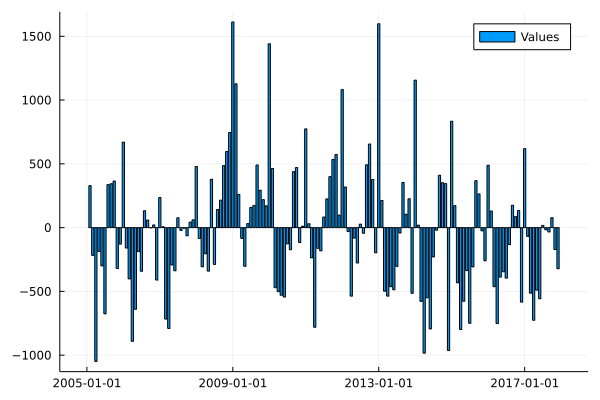

In [80]:
bar(diffts)

Changes in the values are clearly visible throughout the entire dataset, meaning that the variance is relatively constant.

# Autocorrelation
Autocorrelation represents the degree of similarity of a time series and a lagged version of itself over successive time intervals. It is a very important concept as it measures the relationship between a current value and a corresponding past value. Thus, it has many valuable applications in time series forecasting; for example, to match trends and relationships in prices, stocks, returns, and so on.

We want to use autocorrelation to determine if we can reliably identify causality and trend – or if, on the contrary, we're dealing with a random walk model. A random walk would imply that the values in the time series are randomly defined, and this would imply that there's no relationship between past and present values. The random walk model is common, especially for financial and economic data. For a random walk model, forecasting the next value is done by taking the last value in the series. This is due to the fact that future movements are unpredictable—they are equally likely to be increasing or decreasing. Thus, the random walk model underpins naïve forecasts.

We can compute autocorrelation by using a combination of two functions—TimeSeries.lag and xcorr. The lag method works by shifting the values of the time series. For instance, let's use our previously defined ts1:

In [82]:
ts1 

8×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2021-12-12 to 2021-12-19
│            │ A      │
├────────────┼────────┤
│ 2021-12-12 │ 0.7884 │
│ 2021-12-13 │ 0.2627 │
│ 2021-12-14 │ 0.2385 │
│ 2021-12-15 │ 0.5131 │
│ 2021-12-16 │ 0.9372 │
│ 2021-12-17 │ 0.6528 │
│ 2021-12-18 │ 0.1868 │
│ 2021-12-19 │ 0.6911 │

In [83]:
lag(ts1)

7×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2021-12-13 to 2021-12-19
│            │ A      │
├────────────┼────────┤
│ 2021-12-13 │ 0.7884 │
│ 2021-12-14 │ 0.2627 │
│ 2021-12-15 │ 0.2385 │
│ 2021-12-16 │ 0.5131 │
│ 2021-12-17 │ 0.9372 │
│ 2021-12-18 │ 0.6528 │
│ 2021-12-19 │ 0.1868 │

We can experiment with lagging the unemployment data by 12 intervals (12 months) to account for the yearly seasonality:

In [84]:
lagged = lag(unemployment_data, 12) 

144×1 TimeArray{Float64, 2, Date, Matrix{Float64}} 2006-01-01 to 2017-12-01
│            │ Values  │
├────────────┼─────────┤
│ 2006-01-01 │ 21974.0 │
│ 2006-02-01 │ 22303.0 │
│ 2006-03-01 │ 22085.0 │
│ 2006-04-01 │ 21036.0 │
│ 2006-05-01 │ 20849.0 │
│ 2006-06-01 │ 20549.0 │
│ 2006-07-01 │ 19873.0 │
│ 2006-08-01 │ 20210.0 │
│ ⋮          │ ⋮       │
│ 2017-06-01 │ 20611.0 │
│ 2017-07-01 │ 20215.0 │
│ 2017-08-01 │ 20082.0 │
│ 2017-09-01 │ 20257.0 │
│ 2017-10-01 │ 20343.0 │
│ 2017-11-01 │ 20477.0 │
│ 2017-12-01 │ 19893.0 │

In [85]:
common = merge(unemployment_data, lagged) 

144×2 TimeArray{Float64, 2, Date, Matrix{Float64}} 2006-01-01 to 2017-12-01
│            │ Values  │ Values_1 │
├────────────┼─────────┼──────────┤
│ 2006-01-01 │ 21140.0 │ 21974.0  │
│ 2006-02-01 │ 20980.0 │ 22303.0  │
│ 2006-03-01 │ 20578.0 │ 22085.0  │
│ 2006-04-01 │ 19687.0 │ 21036.0  │
│ 2006-05-01 │ 19047.0 │ 20849.0  │
│ 2006-06-01 │ 18859.0 │ 20549.0  │
│ 2006-07-01 │ 18517.0 │ 19873.0  │
│ 2006-08-01 │ 18649.0 │ 20210.0  │
│ ⋮          │ ⋮       │ ⋮        │
│ 2017-06-01 │ 18155.0 │ 20611.0  │
│ 2017-07-01 │ 18172.0 │ 20215.0  │
│ 2017-08-01 │ 18155.0 │ 20082.0  │
│ 2017-09-01 │ 18121.0 │ 20257.0  │
│ 2017-10-01 │ 18199.0 │ 20343.0  │
│ 2017-11-01 │ 18027.0 │ 20477.0  │
│ 2017-12-01 │ 17705.0 │ 19893.0  │

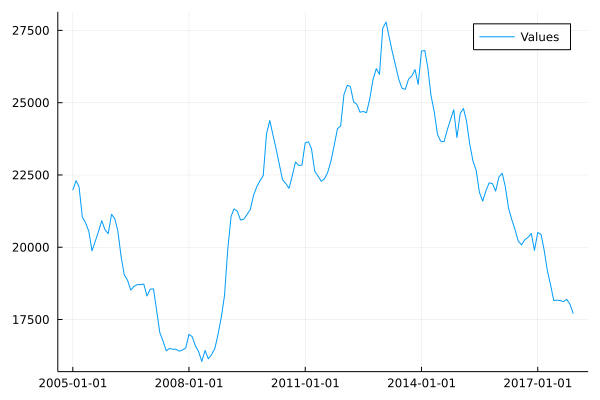

In [86]:
plot(unemployment_data)

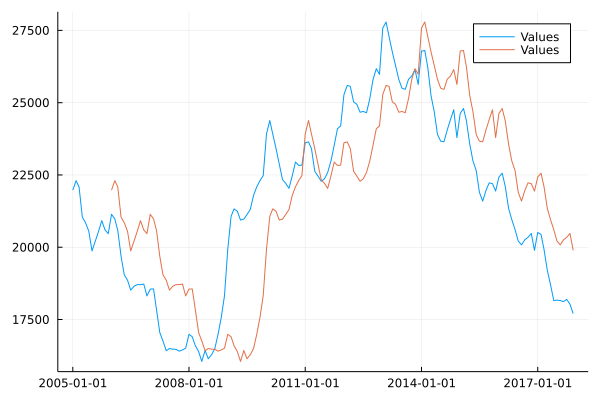

In [87]:
plot!(lagged)

# Time series forecasting
Forecasting implies identifying models that fit the historical data and using them to predict future values. When forecasting time series data, decomposition plays a very important part, helping to make predictions more accurate. The underlying assumption is that we can be more precise if we forecast each component individually, using the best-suited method, and then sum or multiply the parts (depending on whether the model is additive or multiplicative) to compute the final value.

# Naïve
This is the simplest method, stating that the forecasted value is equal to the last value in the series. As mentioned previously, this is used with random walk models, where future movements are unpredictable. For example, to predict the value for the first unknown month, January 2018, using the naïve model, we can take the seasonally adjusted value from December 2017 and add (multiply) the seasonal component of the month of January:

In [89]:
update(unemployment_data, Date(2018, 1, 1), TimeSeries.values(adj_unemployment_data[end])[:][end] * norm_month_avg[1] |> round) 

ArgumentError: ArgumentError: column names don't match

# Simple average
A method that is slightly more advanced involves computing the mean of the previous data points to forecast the next value. It's a basic approach but in some situations, it can be a good fit. To compute it, we can apply the mean function to the underlying array of values:

In [90]:
mean(TimeSeries.values(adj_unemployment_data)[:]) 

21589.641025641027

# Moving average
We covered the moving average in detail when we extracted the trend component of our time series. It can also be employed for forecasting, using the result of the computation to fill up the next value. It is important to pick the right window size by understanding the series' seasonality, for example, by using autocorrelation plots.

# Linear regression
We can use linear regression on the seasonally adjusted time series to forecast the next value. Let's take a closer look at this since it presents some good opportunities to dive into interesting Julia code. Since our data presents three trends (down, up, and down again), let's focus only on the last segment, where the current downward trend can be observed:



We can see that the current trend had started with an unemployment peak, so all we have to do is look for the maximum value in the series

In [91]:
findall(adj_unemployment_data[:Values] .==  
            maximum(TimeSeries.values(adj_unemployment_data)[:])) 

1-element Vector{Int64}:
 98

In [92]:
adj_unemployment_data[98] 

1×1 TimeArray{Float64, 2, Date, Matrix{Float64}} 2013-02-01 to 2013-02-01
│            │ Values  │
├────────────┼─────────┤
│ 2013-02-01 │ 27790.0 │

The downward trend started in February 2013. Let's extract all the data from that moment onward, all the way until the end of the series:

In [93]:
last_trend = from(adj_unemployment_data, Date(2013, 2, 1)) 

59×1 TimeArray{Float64, 2, Date, Matrix{Float64}} 2013-02-01 to 2017-12-01
│            │ Values  │
├────────────┼─────────┤
│ 2013-02-01 │ 27790.0 │
│ 2013-03-01 │ 27292.0 │
│ 2013-04-01 │ 26755.0 │
│ 2013-05-01 │ 26292.0 │
│ 2013-06-01 │ 25805.0 │
│ 2013-07-01 │ 25501.0 │
│ 2013-08-01 │ 25459.0 │
│ 2013-09-01 │ 25813.0 │
│ ⋮          │ ⋮       │
│ 2017-06-01 │ 18155.0 │
│ 2017-07-01 │ 18172.0 │
│ 2017-08-01 │ 18155.0 │
│ 2017-09-01 │ 18121.0 │
│ 2017-10-01 │ 18199.0 │
│ 2017-11-01 │ 18027.0 │
│ 2017-12-01 │ 17705.0 │

We can now compute the linear regression—it will summarize the relationship between the unemployment numbers and the passing of time, allowing us to forecast the next value in the series. We have our unemployment numbers on the y-axis of the plot and the time on the x-axis. In this case, we can express y with the formula y = a+b*x, where a and b correspond to the linear regression. We'll compute the linear regression for the trend series to get a and b, and we'll calculate the next value of y (the unemployment forecast), corresponding to the next value of x (January 2018). Let's go through this, step by step.

The first thing we need to do is convert the timestamps in the time series into a simple integer series that we can use in our equation:

In [94]:
x = 1:length(last_trend) 
y = values(last_trend)[:] 
linreg(x, y) = reverse([x ones(length(x))]\y) 



linreg (generic function with 1 method)

In [95]:
a, b = linreg(x, y) 

2-element Vector{Float64}:
 27522.028053769733
  -161.58229105786094

On the x-axis, we use integer values from 1 to 59, instead of the actual dates. In this line of thought, the next value, the one we want to forecast, will be x = 60, which means that our next y (the forecasted unemployment value) will be 27,608.61 + (-167.13 * 60):

In [96]:
y = a+b*60

17827.090590298074

In [97]:
y = y * norm_month_avg[1] |> round 

18573.0

In [98]:
update(unemployment_data, Date(2018, 1, 1), y) |> plot

ArgumentError: ArgumentError: column names don't match

# Closing thoughts
It should be mentioned that the preceding sections represent only a few of the simplest forecasting methods available. We focused on gaining a good understanding of time series decomposition, which is a key tool for both analysis and forecasting. However, more powerful and more complex forecasting algorithms are available, for example, autoregressive integrated moving average (ARIMA), artificial neural networks (ANN), and Holt-Winters. These are recommended for business-critical predictions. We have now set the foundation for understanding them, but their implementations are more involved and would go beyond the technical expertise assumed by this chapter—especially as Julia's package ecosystem, at the time of writing, does not provide any libraries that implement these algorithms, and we'd have to write them from scratch.

For instance, one commonly-used time series forecasting technique is the Holt-Winters method, also called Triple exponential smoothing. It is based on weighted moving averages and exponential smoothing, both of which have been covered already. You can read more about these at https://www.otexts.org/fpp/7/2 and https://www.otexts.org/fpp/7/5.

ARIMA models are yet another very popular forecasting algorithm. They don't use the trend and seasonality components, instead focusing on autocorrelations in the data. If you're curious, a good starting point to learn about ARIMA models is https://www.otexts.org/fpp/8.